In [1]:
# Load Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from pathlib import Path
import os

In [2]:
s_path=Path.cwd()
s_prt_path=s_path.parent
file=os.path.join(s_prt_path,'datasets\DataModel.plk')
DicData = joblib.load(file)
df_DataModel=DicData['Datos_day']

In [3]:
df_Dem=df_DataModel[['Date','Demanda']]

In [4]:
df_Dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191 entries, 0 to 2190
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2191 non-null   datetime64[ns]
 1   Demanda  2191 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.4 KB


Es necesario remover la tendencdia para identificar de manera correcta los tipos de día

In [5]:
df_Dem['detrended_Dif'] = df_Dem['Demanda'] - df_Dem['Demanda'].shift(1)

C:\Users\alejo\AppData\Local\Temp\ipykernel_27588\2563280961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Dem['detrended_Dif'] = df_Dem['Demanda'] - df_Dem['Demanda'].shift(1)


In [6]:
df_Dem.head(5)

,Date,Demanda,detrended_Dif
0,2013-01-01,5.151631e+06,NaN
1,2013-01-02,6.244420e+06,1.092788e+06
2,2013-01-03,6.579915e+06,3.354955e+05
3,2013-01-04,6.683919e+06,1.040039e+05
4,2013-01-05,6.441511e+06,-2.424083e+05


In [7]:
window_size = 3  # Adjust the window size as needed
df_Dem['rolling_mean'] = df_Dem['Demanda'].rolling(window=window_size).mean()
df_Dem['detrended_ma'] = df_Dem['Demanda'] - df_Dem['rolling_mean']

C:\Users\alejo\AppData\Local\Temp\ipykernel_27588\2910724143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Dem['rolling_mean'] = df_Dem['Demanda'].rolling(window=window_size).mean()
C:\Users\alejo\AppData\Local\Temp\ipykernel_27588\2910724143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Dem['detrended_ma'] = df_Dem['Demanda'] - df_Dem['rolling_mean']


In [8]:
df_Dem.head(10)

,Date,Demanda,detrended_Dif,rolling_mean,detrended_ma
0,2013-01-01,5.151631e+06,NaN,NaN,NaN
1,2013-01-02,6.244420e+06,1.092788e+06,NaN,NaN
2,2013-01-03,6.579915e+06,3.354955e+05,5.991989e+06,587926.377778
3,2013-01-04,6.683919e+06,1.040039e+05,6.502751e+06,181167.799444
4,2013-01-05,6.441511e+06,-2.424083e+05,6.568448e+06,-126937.577917
5,2013-01-06,5.818069e+06,-6.234420e+05,6.314499e+06,-496430.783472
6,2013-01-07,5.905747e+06,8.767838e+04,6.055109e+06,-149361.751111
7,2013-01-08,6.811401e+06,9.056540e+05,6.178406e+06,632995.477917
8,2013-01-09,6.945948e+06,1.345470e+05,6.554365e+06,391582.707500
9,2013-01-10,7.019884e+06,7.393586e+04,6.925744e+06,94139.592083


In [9]:
df_Dem_ini=df_Dem[['Date','Demanda']]

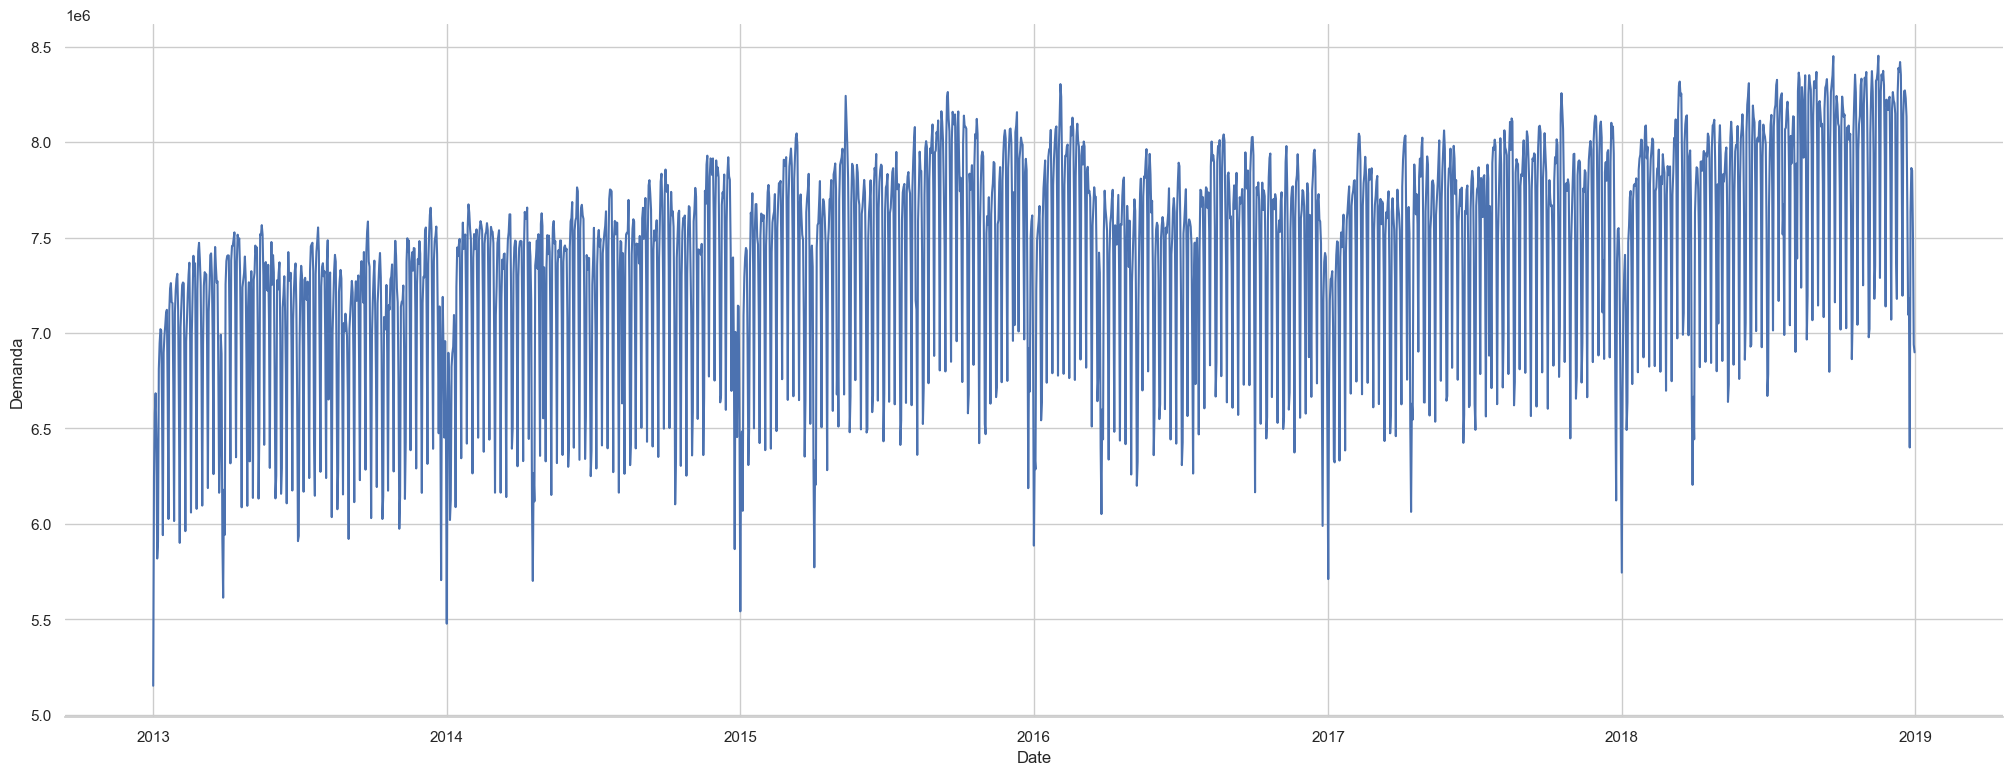

In [10]:

sns.set(rc={'figure.figsize':(25,9)})
sns.set(style="whitegrid")
sns.lineplot(data = df_Dem_ini, x='Date', y='Demanda')
sns.despine(left=True)

In [11]:
df_Dem_dif=df_Dem[['Date','detrended_Dif']]
df_Dem_dif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191 entries, 0 to 2190
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2191 non-null   datetime64[ns]
 1   detrended_Dif  2190 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.4 KB


In [12]:
df_Dem_dif=df_Dem_dif.dropna()
df_Dem_dif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 1 to 2190
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2190 non-null   datetime64[ns]
 1   detrended_Dif  2190 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.3 KB


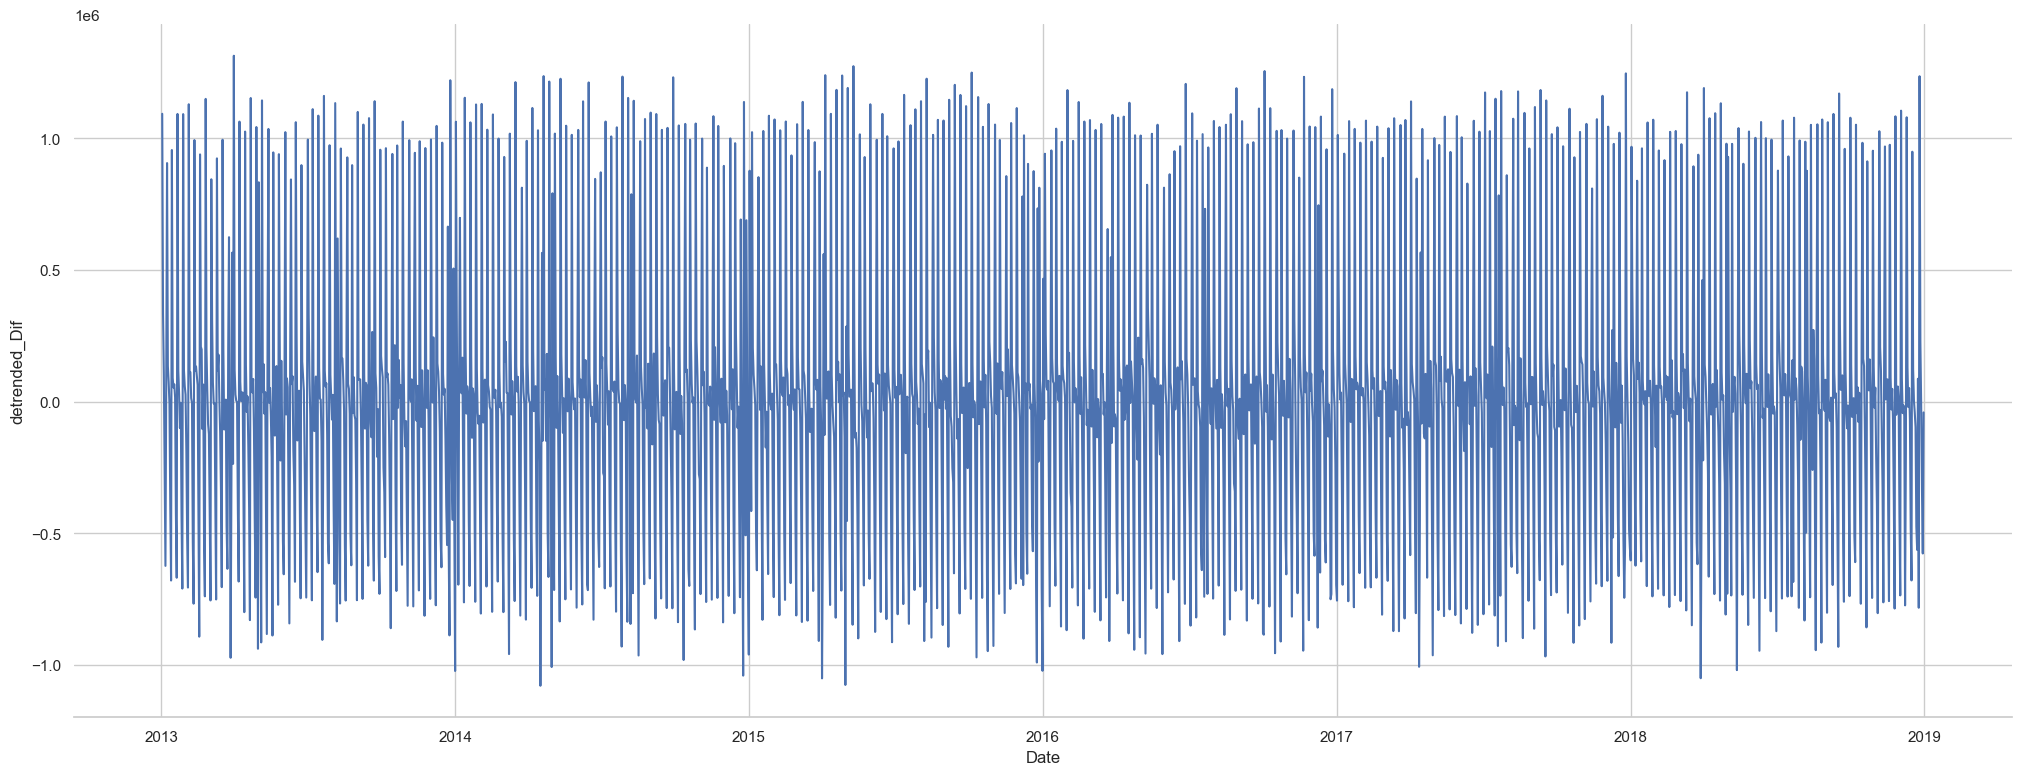

In [13]:
sns.set(rc={'figure.figsize':(25,9)})
sns.set(style="whitegrid")
sns.lineplot(data = df_Dem_dif, x='Date', y='detrended_Dif')
sns.despine(left=True)

In [14]:
df_Dem_ma=df_Dem[['Date','detrended_ma']]
df_Dem_ma=df_Dem_ma.dropna()
df_Dem_ma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189 entries, 2 to 2190
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2189 non-null   datetime64[ns]
 1   detrended_ma  2189 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.3 KB


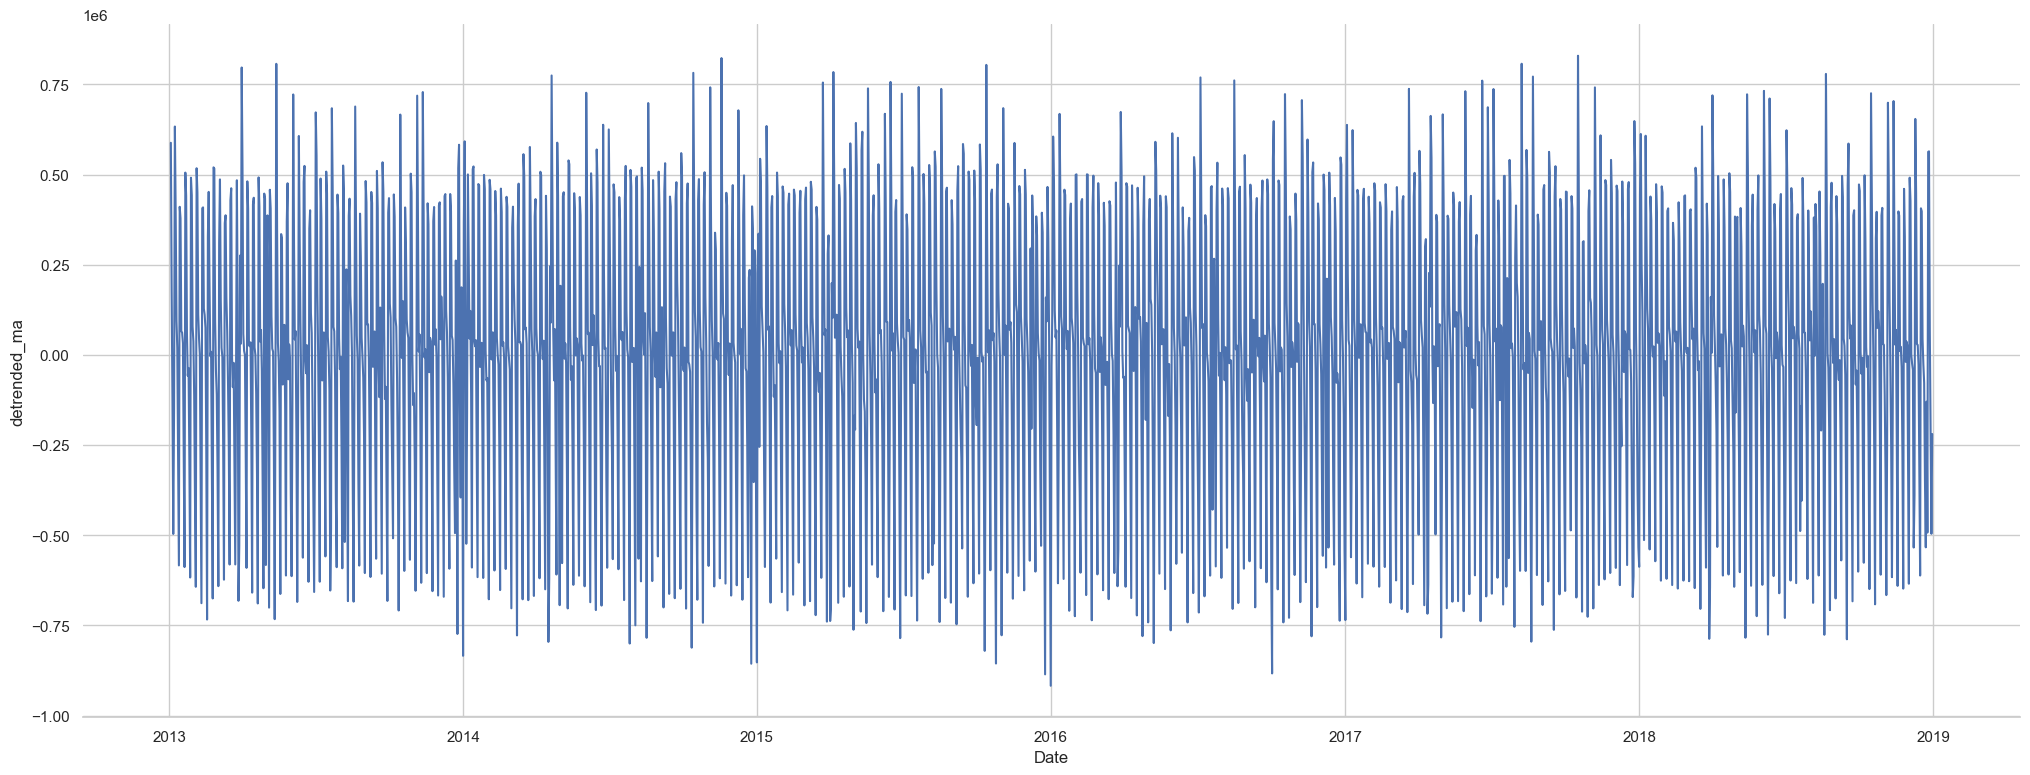

In [15]:
sns.set(rc={'figure.figsize':(25,9)})
sns.set(style="whitegrid")
sns.lineplot(data = df_Dem_ma, x='Date', y='detrended_ma')
sns.despine(left=True)

Asignar los datos a una variable

In [16]:

dataAux=df_Dem[['Date','Demanda']]
dateIni='2013-01-01'

iiter=0
delta=0
dmeanini=0
df_Aux=pd.DataFrame()
df_Fin=pd.DataFrame()
while df_Aux.shape[0]>1 or iiter==0:

    dateFin=str(pd.to_datetime(dateIni) + pd.Timedelta(days=30))
    df_Aux=dataAux[(dataAux.Date>=dateIni) & (dataAux.Date<=dateFin)]
    dmean=df_Aux['Demanda'].mean()

    if iiter>0:
        delta=max(0,dmean-demRef)
        df_Aux.loc[:,'Demanda']=df_Aux.loc[:,'Demanda']-delta
        df_Fin=pd.concat([df_Fin,df_Aux],axis=0)
    else:
        demRef=dmean
        df_Fin=pd.concat([df_Fin,df_Aux],axis=0)

    #dmeanini=dmean
    dateIni=str(pd.to_datetime(dateIni) + pd.Timedelta(days=31))
    iiter+=1

df_Dem['DemCal']=df_Fin['Demanda']

C:\Users\alejo\AppData\Local\Temp\ipykernel_27588\288980329.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Aux.loc[:,'Demanda']=df_Aux.loc[:,'Demanda']-delta
C:\Users\alejo\AppData\Local\Temp\ipykernel_27588\288980329.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Aux.loc[:,'Demanda']=df_Aux.loc[:,'Demanda']-delta
C:\Users\alejo\AppData\Local\Temp\ipykernel_27588\288980329.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

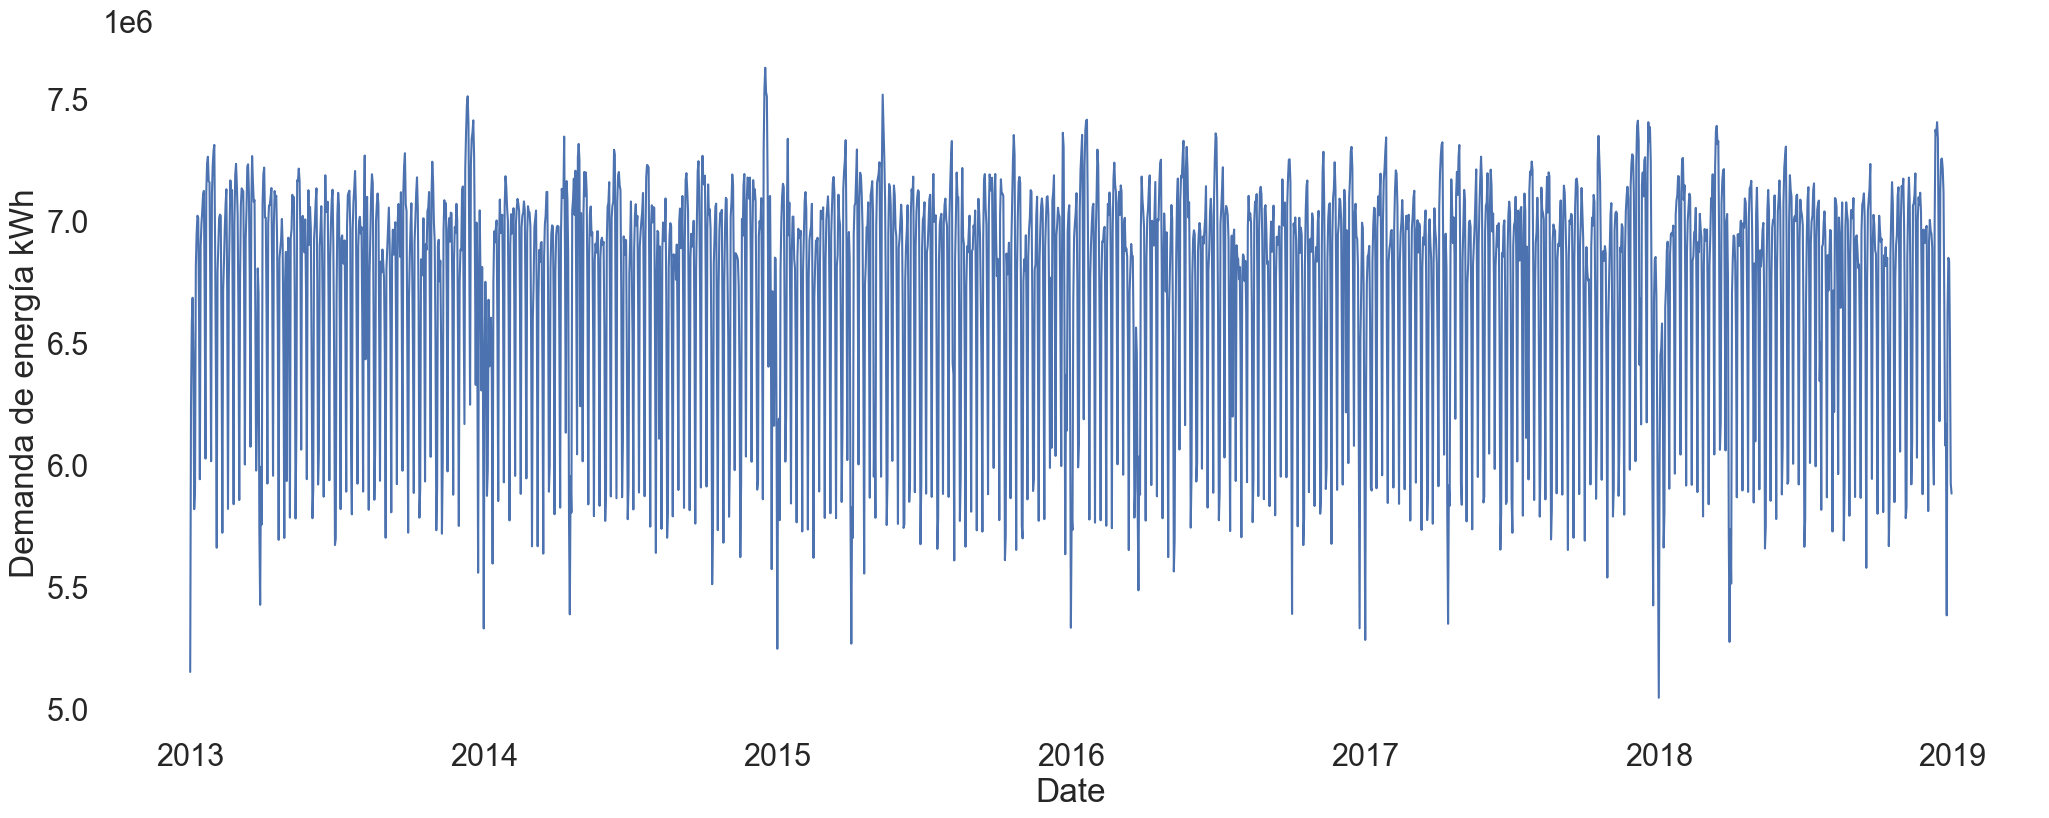

In [45]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(25,9)})
sns.set(style="whitegrid")
sns.set(font_scale=2)
sns.lineplot(data = df_Dem, x='Date', y='DemCal')
ax.set_ylabel('Demanda de energía kWh')
ax.set_facecolor('white')
sns.despine(left=True)


In [18]:
#DemCls=df_Dem_ma['detrended_ma']
#DemCls=df_Dem_dif['detrended_Dif']
DemCls=df_Dem['DemCal']

[5151631.46416667 6244419.54916667 6579915.07333333 ... 6499356.15768305
 5922944.93976639 5881998.70559972]


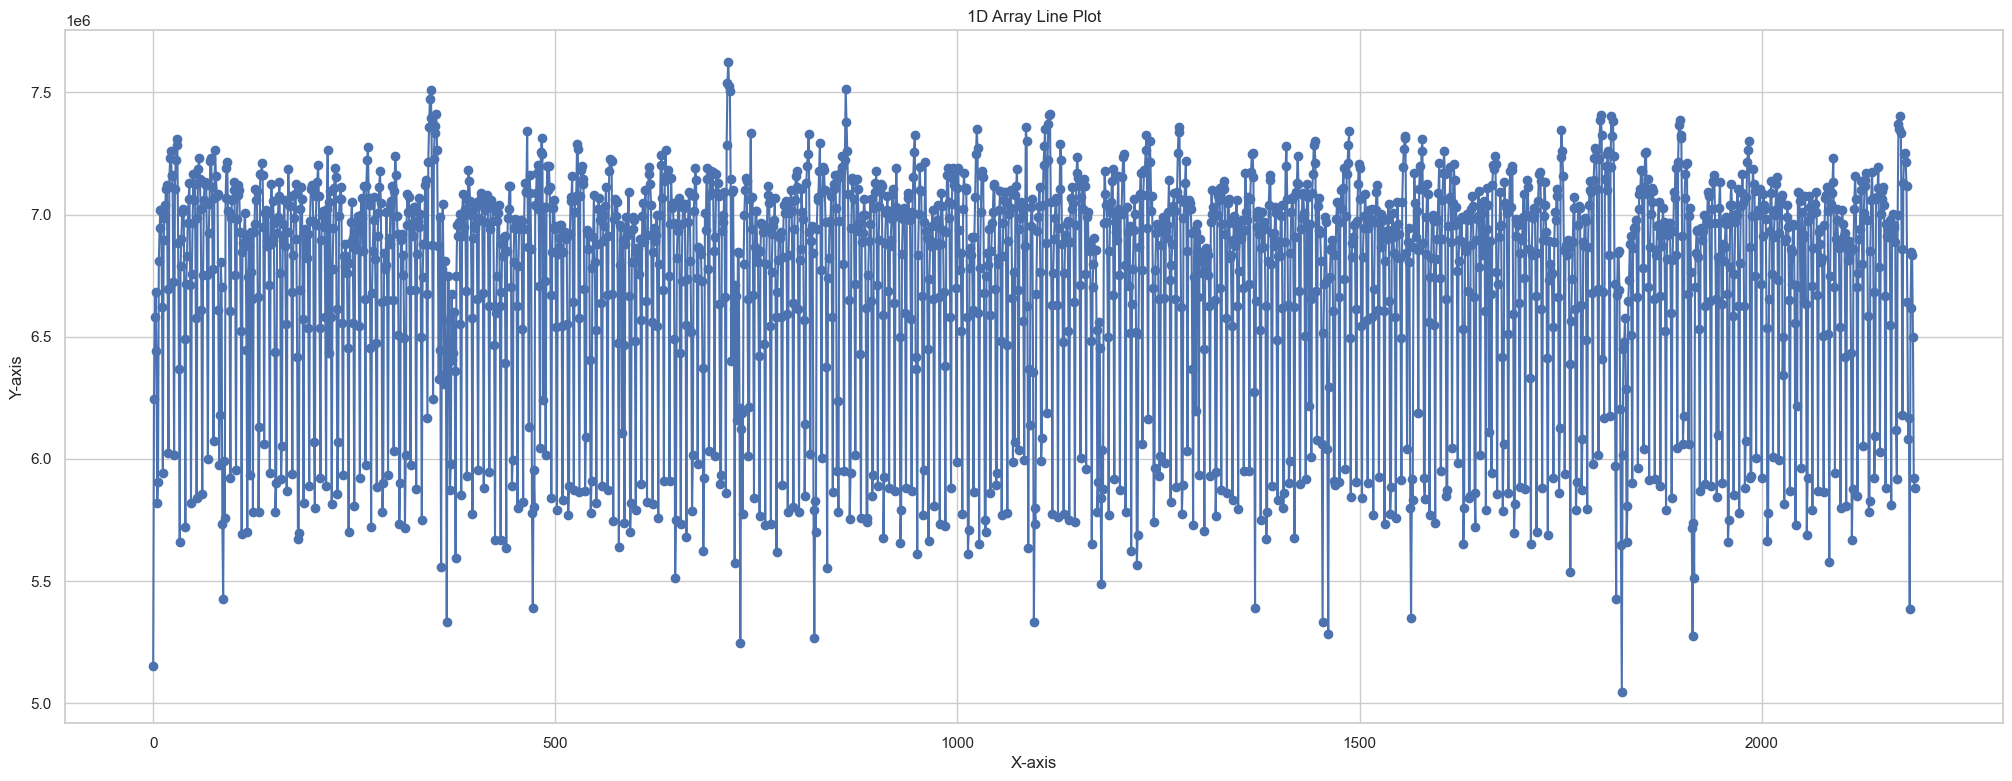

In [19]:
import numpy as np

DemCls_arr=np.array(DemCls)
print(DemCls_arr)

# Create a corresponding x-axis
x = np.arange(len(DemCls))

# Create a line plot
plt.plot(x, DemCls, marker='o')

# Add labels and a title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('1D Array Line Plot')

# Show the plot
plt.show()


In [20]:
DemCls_arr = DemCls_arr.reshape(-1, 1)
print(DemCls_arr)

[[5151631.46416667]
 [6244419.54916667]
 [6579915.07333333]
 ...
 [6499356.15768305]
 [5922944.93976639]
 [5881998.70559972]]


In [21]:
lisk=[3,4,5,6,7]
lisSh=[]
for k in lisk:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(DemCls_arr)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(DemCls_arr, labels)
    lisSh.append(silhouette_avg)

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [22]:
print(lisk,lisSh)

[3, 4, 5, 6, 7] [0.6215454279110286, 0.5785287641667183, 0.5372088702463995, 0.5280554761270395, 0.5247325806762605]


Se observa que la mejor agrupación se de con k=4

In [23]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(DemCls_arr)
labels = kmeans.labels_
silhouette_avg = silhouette_score(DemCls_arr, labels)
print(silhouette_avg)

0.6215454279110286


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
my_list=list(labels)
unique_list = list(set(my_list))
print(unique_list)

[0, 1, 2]


In [25]:
for i in unique_list:
    # Count the number of times a value appears in the list
    value_to_count = i  # Change this to the value you want to count
    count = my_list.count(value_to_count)
    print(i,count)

0 425
1 1241
2 525


In [26]:
#data_Label=df_Dem_ma.copy()
data_Label=df_Dem.copy()
data_Label['day_cls']=my_list

In [27]:
data_Label.head(10)

,Date,Demanda,detrended_Dif,rolling_mean,detrended_ma,DemCal,day_cls
0,2013-01-01,5.151631e+06,NaN,NaN,NaN,5.151631e+06,0
1,2013-01-02,6.244420e+06,1.092788e+06,NaN,NaN,6.244420e+06,0
2,2013-01-03,6.579915e+06,3.354955e+05,5.991989e+06,587926.377778,6.579915e+06,2
3,2013-01-04,6.683919e+06,1.040039e+05,6.502751e+06,181167.799444,6.683919e+06,2
4,2013-01-05,6.441511e+06,-2.424083e+05,6.568448e+06,-126937.577917,6.441511e+06,2
5,2013-01-06,5.818069e+06,-6.234420e+05,6.314499e+06,-496430.783472,5.818069e+06,0
6,2013-01-07,5.905747e+06,8.767838e+04,6.055109e+06,-149361.751111,5.905747e+06,0
7,2013-01-08,6.811401e+06,9.056540e+05,6.178406e+06,632995.477917,6.811401e+06,2
8,2013-01-09,6.945948e+06,1.345470e+05,6.554365e+06,391582.707500,6.945948e+06,1
9,2013-01-10,7.019884e+06,7.393586e+04,6.925744e+06,94139.592083,7.019884e+06,1


In [28]:
import holidays
co_holidays = holidays.Colombia()

def typedays(row,weekday):

     if weekday==True:
          return row['Date'].weekday()
     else:
          if row['Date'] in co_holidays:
               return 4
          elif row['Date'].weekday()==5:
               return 2
          elif row['Date'].weekday()==6:
               return 3
          else:
               return 1

In [29]:
df_print=data_Label[['Date','day_cls']]
df_print['day_osf']=df_print.apply(lambda row: typedays(row,weekday=False),axis=1)
df_print['Typeday']=df_print.apply(lambda row: typedays(row,weekday=True),axis=1)

C:\Users\alejo\AppData\Local\Temp\ipykernel_27588\1181881708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_print['day_osf']=df_print.apply(lambda row: typedays(row,weekday=False),axis=1)
C:\Users\alejo\AppData\Local\Temp\ipykernel_27588\1181881708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_print['Typeday']=df_print.apply(lambda row: typedays(row,weekday=True),axis=1)


In [30]:
df_print.set_index('Date', inplace=True)
file=os.path.join(s_prt_path,'datasets\Dayslabels.csv')
df_print.to_csv(file)

In [31]:
df_print

,day_cls,day_osf,Typeday
Date,,,
2013-01-01,0,4,1
2013-01-02,0,1,2
2013-01-03,2,1,3
2013-01-04,2,1,4
2013-01-05,2,2,5
...,...,...,...
2018-12-27,2,1,3
2018-12-28,2,1,4
2018-12-29,2,2,5


In [32]:
data_Label.set_index('Date', inplace=True)

In [33]:
df_print['Demanda']=data_Label.loc[:,'DemCal']

C:\Users\alejo\AppData\Local\Temp\ipykernel_27588\3778678989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_print['Demanda']=data_Label.loc[:,'DemCal']


In [34]:
df_print.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2191 entries, 2013-01-01 to 2018-12-31
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   day_cls  2191 non-null   int32  
 1   day_osf  2191 non-null   int64  
 2   Typeday  2191 non-null   int64  
 3   Demanda  2191 non-null   float64
dtypes: float64(1), int32(1), int64(2)
memory usage: 77.0 KB


In [35]:
nparray=np.array(df_print)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


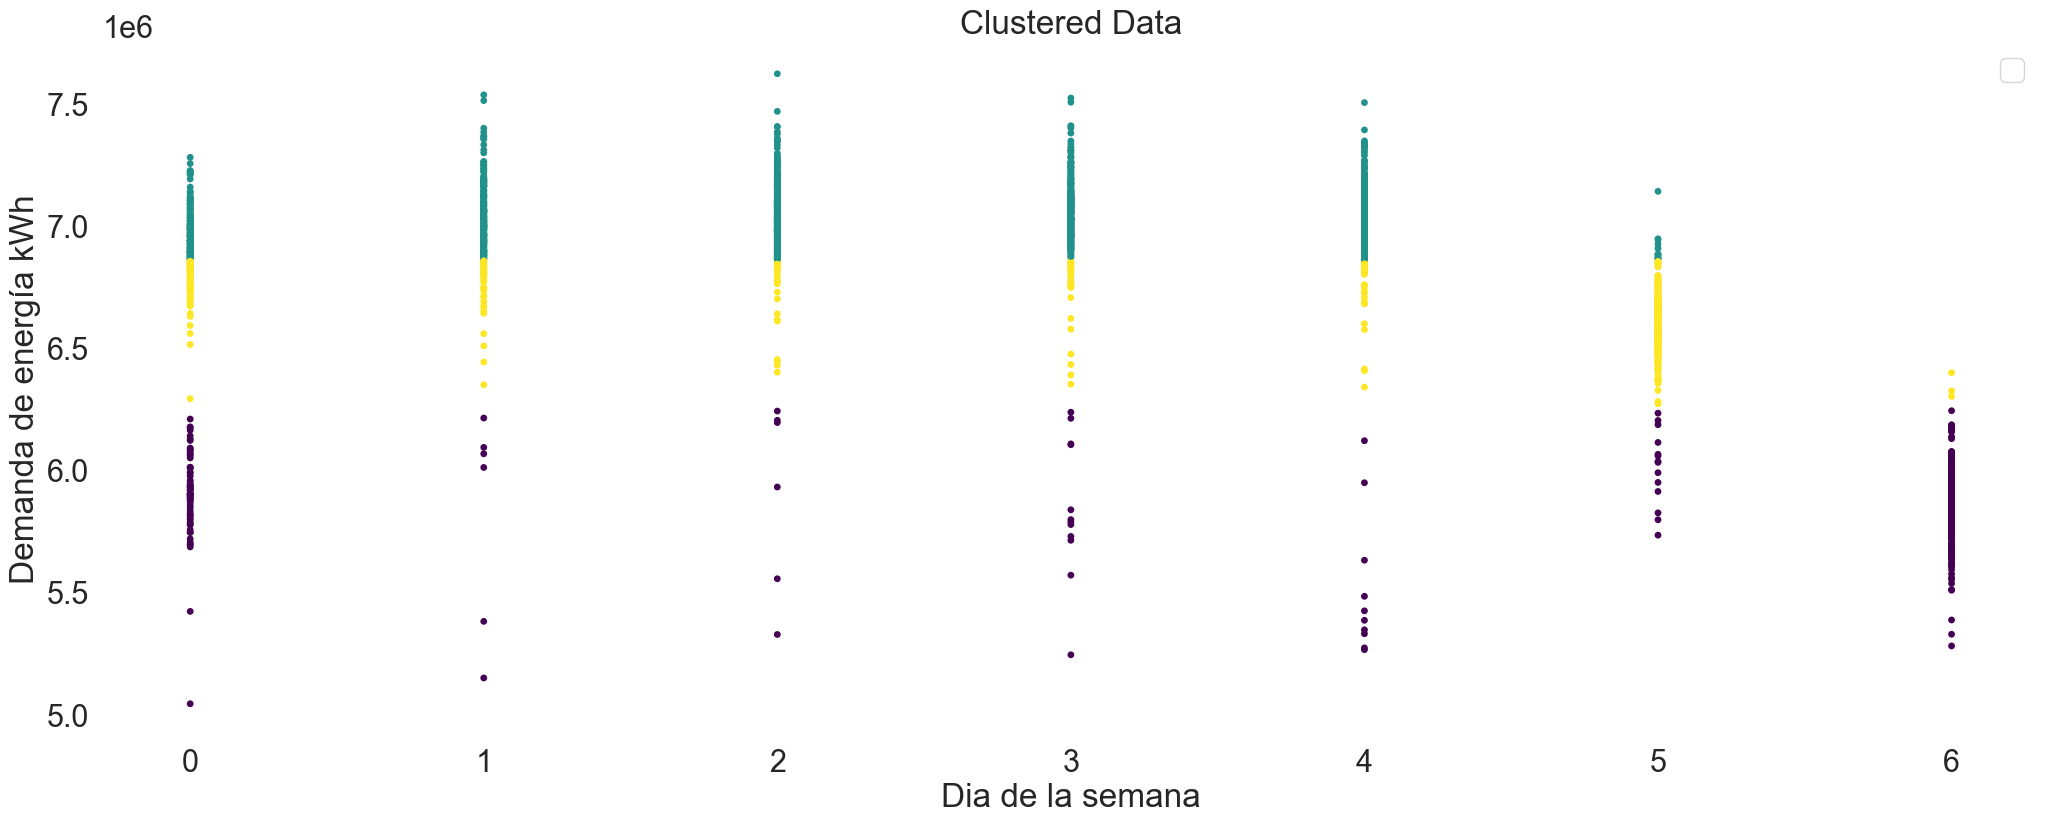

In [51]:
fig, ax = plt.subplots()
plt.scatter(nparray[:, 2], nparray[:, 3],c=nparray[:, 0], s=15, cmap='viridis')    
plt.title("Clustered Data")
plt.xlabel('Dia de la semana')
plt.ylabel('Demanda de energía kWh')
ax.legend(facecolor='white')
ax.set_facecolor('white')
plt.show()